# Understanding Classification on Iris Data

### Step 1. Import Libraries

In [77]:
from sklearn.utils.testing import all_estimators
from sklearn.base import ClassifierMixin
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import seaborn as sb
import pandas as pd

### Step 2. Import the Iris Data from Sklearn datasets

In [78]:
from sklearn.datasets import load_iris
iris = load_iris()

Find Numberical and Categoryical Features from the dataset

### Step 3. Define Features (Xs) and Taget (Y)

#### 3.1 Features (xs)

In [79]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

From the dataset set, it is evident that these features are Numerical Data

#### 3.2 Target (Y)

In [80]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

From the dataset we can say that our target names are Categorical Data

### 4. Preprocessing Numerical Data and Categorical Data

Import preprocessing library

In [81]:
from sklearn import preprocessing

Shape of the Dataset

In [82]:
iris.data.shape

(150, 4)

Creating dataframe for the dataset

In [83]:
df=pd.DataFrame(iris.data,columns=['sepal length','sepal width','petal length','petal width'])

#### 4.1 Finding co-relation between the columns using heatmap

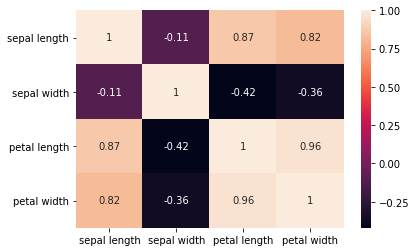

In [84]:
sb.heatmap(df.corr(),annot=True)

#### 4.2 Pair plot between the columns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


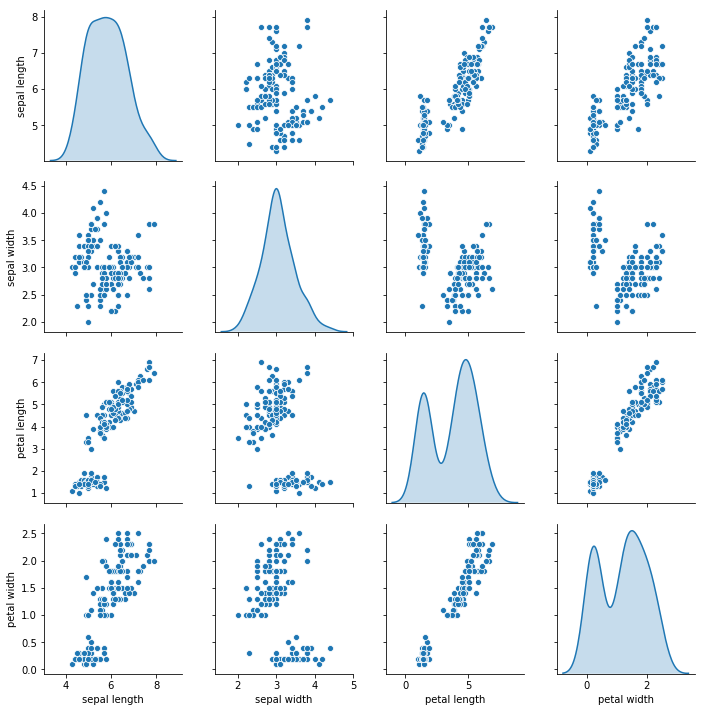

In [85]:
sb.pairplot(df,diag_kind = "kde")

#### 4.3 Visualization of Numerical dataset without scaling or normalizing

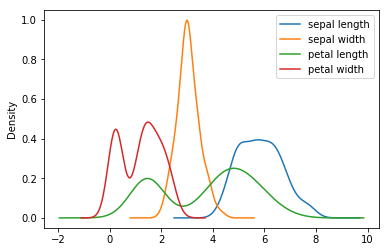

In [86]:
df.plot.kde()

In [87]:
df.skew()

sepal length    0.314911
sepal width     0.334053
petal length   -0.274464
petal width    -0.104997
dtype: float64

#### 4.4 Scaling on Numeerical Dataset and visualization of data

#### 4.4.1 Scale function

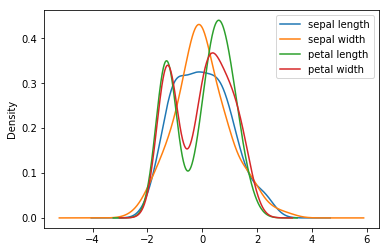

In [88]:
x_scaled=preprocessing.scale(df)
x_scaled=pd.DataFrame(x_scaled,columns=['sepal length','sepal width','petal length','petal width'])
x_scaled.plot.kde()

Scaled data mean and unit variance

In [89]:
x_scaled.mean(axis=0)

sepal length   -1.690315e-15
sepal width    -1.637024e-15
petal length   -1.482518e-15
petal width    -1.623146e-15
dtype: float64

In [90]:
x_scaled.std(axis=0)

sepal length    1.00335
sepal width     1.00335
petal length    1.00335
petal width     1.00335
dtype: float64

In [91]:
x_scaled.skew()

sepal length    0.314911
sepal width     0.334053
petal length   -0.274464
petal width    -0.104997
dtype: float64

#### 4.4.2 Standard Scaler Function

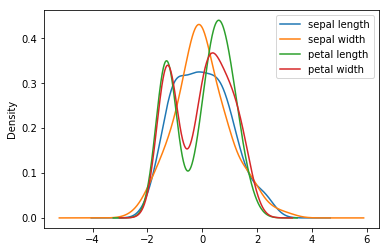

In [92]:
scaler = preprocessing.StandardScaler().fit(df)

scale_data=scaler.transform(df)

scale_data=pd.DataFrame(scale_data,columns=['sepal length','sepal width','petal length','petal width'])

scale_data.plot.kde()

In [93]:
scale_data.skew()

sepal length    0.314911
sepal width     0.334053
petal length   -0.274464
petal width    -0.104997
dtype: float64

#### 4.4.3 Scaling Features to a Range

#### 4.4.3 a) MinMaxScaler Function

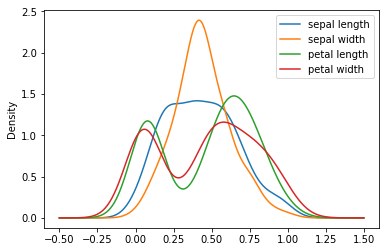

In [94]:
min_max_scaler=preprocessing.MinMaxScaler()
x_minmax=min_max_scaler.fit_transform(df)

x_minmax

x_minmax=pd.DataFrame(x_minmax,columns=['sepal length','sepal width','petal length','petal width'])
x_minmax.plot.kde()

In [95]:
x_minmax.skew()

sepal length    0.314911
sepal width     0.334053
petal length   -0.274464
petal width    -0.104997
dtype: float64

#### 4.4.3 b) MaxAbsScaler Function

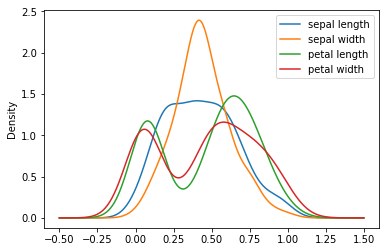

In [96]:
max_abs_scaler=preprocessing.MaxAbsScaler()

max_abs_scaler=min_max_scaler.fit_transform(df)

max_abs_scaler=pd.DataFrame(max_abs_scaler,columns=['sepal length','sepal width','petal length','petal width'])
max_abs_scaler.plot.kde()

In [97]:
max_abs_scaler.skew()

sepal length    0.314911
sepal width     0.334053
petal length   -0.274464
petal width    -0.104997
dtype: float64

#### 4.4.4 Normalizer Function

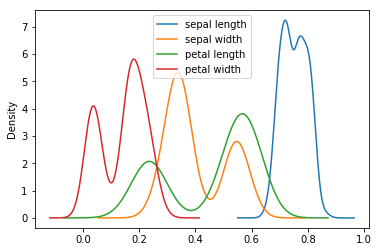

In [98]:
normalizer=preprocessing.Normalizer()
normalize_data=normalizer.fit_transform(df)


normalize_data=pd.DataFrame(normalize_data,columns=['sepal length','sepal width','petal length','petal width'])
normalize_data.plot.kde()

#### 4.4.5 Quantile Transformer (Uniform)

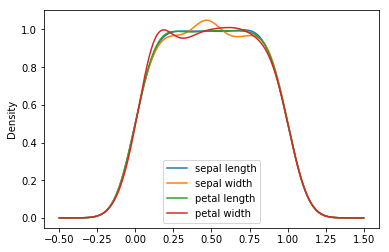

In [99]:
qt_uniform=preprocessing.QuantileTransformer()
qt_uniform =qt_uniform.fit_transform(df)


qt_uniform_df=pd.DataFrame(qt_uniform,columns=['sepal length','sepal width','petal length','petal width'])
qt_uniform_df.plot.kde()

Skewness of the data after quantile transformation

In [100]:
qt_uniform_df.skew()

sepal length   -0.001610
sepal width     0.003023
petal length    0.004413
petal width     0.015738
dtype: float64

#### 4.4.6 Quantile transformation (Normal)

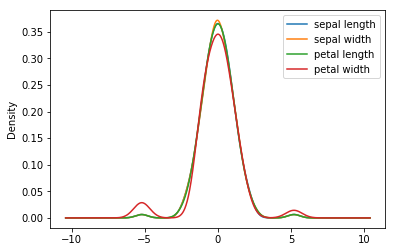

In [101]:
qt_normal=preprocessing.QuantileTransformer(output_distribution= "normal")
qt_normal =qt_normal.fit_transform(df)


qt_normal_df=pd.DataFrame(qt_normal,columns=['sepal length','sepal width','petal length','petal width'])
qt_normal_df.plot.kde()

In [102]:
qt_normal_df.skew()

sepal length   -0.007385
sepal width     0.007689
petal length    0.011608
petal width    -0.638581
dtype: float64

#### 4.5 Preprocessing Categorical Data

Encoding categorical features

In Iris Dataset,Categorical Features are Target names

In [103]:
enc=preprocessing.OneHotEncoder(sparse=False)
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [104]:
iris.target
target_df=pd.DataFrame(iris.target,columns=['species'])

In [105]:
enc=enc.fit_transform(target_df)

In [106]:
enc.shape

(150, 3)

In [107]:
enc[1:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

## 5. Fine Tune ML models

get all the estimators inculding regression and classification from scikit learn

In [108]:
for est in all_estimators():
    print(est[1])

<class 'sklearn.linear_model.bayes.ARDRegression'>
<class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>
<class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'>
<class 'sklearn.kernel_approximation.AdditiveChi2Sampler'>
<class 'sklearn.cluster.affinity_propagation_.AffinityPropagation'>
<class 'sklearn.cluster.hierarchical.AgglomerativeClustering'>
<class 'sklearn.ensemble.bagging.BaggingClassifier'>
<class 'sklearn.ensemble.bagging.BaggingRegressor'>
<class 'sklearn.mixture.bayesian_mixture.BayesianGaussianMixture'>
<class 'sklearn.linear_model.bayes.BayesianRidge'>
<class 'sklearn.naive_bayes.BernoulliNB'>
<class 'sklearn.neural_network.rbm.BernoulliRBM'>
<class 'sklearn.preprocessing.data.Binarizer'>
<class 'sklearn.cluster.birch.Birch'>
<class 'sklearn.cross_decomposition.cca_.CCA'>
<class 'sklearn.calibration.CalibratedClassifierCV'>
<class 'sklearn.cluster.dbscan_.DBSCAN'>
<class 'sklearn.mixture.dpgmm.DPGMM'>
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
<class

ClassifierMixin gets all the classification estimators from scickit learn

In [109]:
classifiers=[est for est in all_estimators() if issubclass(est[1], ClassifierMixin)]

## 5.1 Import all classifcation estimators automatically

In [110]:
for id in range(len(classifiers)):
    exec("from "+classifiers[id][1].__module__+" import "+classifiers[id][0])
    print(("from "+classifiers[id][1].__module__+" import "+classifiers[id][0]))

from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree.tree import DecisionTreeClassifier
from sklearn.tree.tree import ExtraTreeClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.gpc import GaussianProcessClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.semi_supervised.label_propagation import LabelPropagation
from sklearn.semi_supervised.label_propagation import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm.classes import LinearSVC
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.linear_model.logistic import LogisticRegression

30 Classifiers in Scikit learn

In [111]:
range(len(classifiers))

range(0, 30)

Using Standard Scalar data

In [112]:
x_train, x_test,y_train,y_test = train_test_split(scale_data,target_df, test_size = 0.3)

In [113]:
x_train.head()

,sepal length,sepal width,petal length,petal width
7,-1.021849,0.800654,-1.284407,-1.312977
59,-0.779513,-0.819166,0.080370,0.264699
0,-0.900681,1.032057,-1.341272,-1.312977
27,-0.779513,1.032057,-1.284407,-1.312977
102,1.522676,-0.124958,1.217684,1.185010


In [114]:
y_train.head()

,species
7,0
59,1
0,0
27,0
102,2


In [115]:
x_test.shape

(45, 4)

### 5.2 Neural Net (MLP Classifier)

In [116]:
mlp=MLPClassifier()

In [117]:
MLPclassifier_HP= {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [118]:
clf = GridSearchCV(mlp,MLPclassifier_HP, n_jobs=-1, cv=3)
clf.fit(x_train,y_train['species'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [119]:
clf_predict=clf.predict(x_test)
print(classification_report(y_test,clf_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.89      0.94        18
          2       0.88      1.00      0.93        14

avg / total       0.96      0.96      0.96        45



In [120]:
accuracy_score(y_test,clf_predict)

0.9555555555555556

In [121]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [122]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.905 (+/-0.027) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.952 (+/-0.056) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.914 (+/-0.045) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.952 (+/-0.056) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.895 (+/-0.054) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.943 (+/-0.049) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.905 (+/-0.070) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 

## 5.3 Random Forest

In [123]:
rf=RandomForestClassifier()
rf_hp= {#n_estimators':[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
                'n_estimators':[200, 400, 600],           
            'max_features': ['auto', 'sqrt','log2',None],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap':  [True, False]}

In [124]:
clf = GridSearchCV(rf,rf_hp, n_jobs=-1, cv=3)
clf.fit(x_train,y_train['species'])

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [200, 400, 600], 'max_features': ['auto', 'sqrt', 'log2', None], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [125]:
clf_predict=clf.predict(x_test)
print(classification_report(y_test,clf_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00        18
          2       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        45



In [126]:
print("Accuracy:",accuracy_score(y_test,clf_predict))
print('Best parameters found:\n', clf.best_params_)

Accuracy: 1.0
Best parameters found:
 {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}


In [127]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.933 (+/-0.074) for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.933 (+/-0.074) for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
0.933 (+/-0.074) for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}
0.943 (+/-0.048) for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
0.943 (+/-0.048) for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}
0.943 (+/-0.048) for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 600}
0.933 (+/-0.074) for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf'

0.943 (+/-0.003) for {'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 400}
0.943 (+/-0.003) for {'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 600}
0.943 (+/-0.003) for {'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
0.933 (+/-0.030) for {'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 400}
0.943 (+/-0.003) for {'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 600}
0.943 (+/-0.003) for {'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
0.933 (+/-0.030) for {'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_sampl

0.933 (+/-0.030) for {'bootstrap': False, 'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 400}
0.943 (+/-0.003) for {'bootstrap': False, 'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 600}
0.943 (+/-0.048) for {'bootstrap': False, 'max_depth': 80, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.943 (+/-0.048) for {'bootstrap': False, 'max_depth': 80, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
0.933 (+/-0.074) for {'bootstrap': False, 'max_depth': 80, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}
0.933 (+/-0.030) for {'bootstrap': False, 'max_depth': 80, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
0.933 (+/-0.030) for {'bootstrap': False, 'max_depth': 80, 'max_features': 'log2', 'min_samp

## 5.4 XG Boost

In [128]:
import xgboost as xgb
d_train=xgb.DMatrix(x_train,label=y_train)
d_test=xgb.DMatrix(x_test,label=y_test)

In [129]:
xg_hp = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20
model = xgb.train(param, D_train, steps)


NameError: name 'param' is not defined

In [ ]:
def hyperparameter_grid(classifier,classifier_hp,x_train,y_train,x_test,y_test):
    print("Classifier:",classifier)
    eval(classifier +"()")
    clf=GridSearchCV(classifier,classifier_hp,n_jobs=-1,cv=3)
    clf.fit(x_train,y_train)
    clf_predict=clf.predict(x_test)
    print(classification_report(y_test,clf_predict))
    print("Accuracy:",accuracy_score(y_test,clf_predict))
    print('Best parameters found:\n', clf.best_params_)
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
hyperparameter_grid("MLPClassifier",MLPclassifier_HP,x_train,y_train['species'],x_test,y_test)